# Phase - 3: SQL Operations

In [1]:
# Importing libraries
import sqlite3
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Establishing a connection to the SQLite database named "Crimes_in_India.db"
conn = sqlite3.connect("Crimes_in_India.db")

# Creating a cursor object to interact with the database
cursor = conn.cursor()

### 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

In [3]:
# Creating table for storing district wise crimes committed against women from 2001 to 2012
cursor.execute('''CREATE TABLE IF NOT EXISTS District_wise_crimes_committed_against_women_2001_2012 (
                  State_UT TEXT,
                  District TEXT,
                  Year INTEGER,
                  Rape INTEGER,
                  Kidnapping_and_Abduction INTEGER,
                  Dowry_Deaths INTEGER,
                  Assault_on_women_with_intent_to_outrage_her_modesty INTEGER,
                  Insult_to_modesty_of_Women INTEGER,
                  Cruelty_by_Husband_or_his_Relatives INTEGER,
                  Importation_of_Girls INTEGER);''')

In [4]:
# Insering values in the table
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        cursor.execute('''INSERT INTO District_wise_crimes_committed_against_women_2001_2012 
                          VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?);''', row)

In [5]:
conn.commit()

In [6]:
# Deleting unnecessay values from table
cursor.execute('''DELETE FROM District_wise_crimes_committed_against_women_2001_2012
                  WHERE District LIKE '%TOTAL%';''')

In [7]:
conn.commit()

### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, district, and year.

In [8]:
# SQL query to find the highest number of rapes that happened in which state, district, and year
results = cursor.execute('''SELECT State_UT, District, Year, Rape
                            FROM District_wise_crimes_committed_against_women_2001_2012
                            ORDER BY Rape DESC
                            LIMIT 1;''')

for row in results:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2009, 568)


In 2009, Murshidabad, West Bengal reported the highest incidence of rapes, with a total of 568 cases recorded.

In [9]:
# SQL query to find the highest number of kidnappings that happened in which state, district, and year
results = cursor.execute('''SELECT State_UT, District, Year, Kidnapping_and_Abduction
                            FROM District_wise_crimes_committed_against_women_2001_2012
                            ORDER BY Kidnapping_and_Abduction DESC
                            LIMIT 1;''')

for row in results:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 492)


In 2009, Murshidabad, West Bengal reported the highest incidence of kidnappings, with a total of 492 cases recorded.

### 3.3	Write SQL query to find all the lowest number of rapes & kidnappings that happened in which state, district, and year.

In [10]:
# SQL query to find all the lowest number of rapes that happened in which state, district, and year
results = cursor.execute('''SELECT State_UT, District, Year, Rape
                            FROM District_wise_crimes_committed_against_women_2001_2012
                            WHERE Rape = (SELECT MIN(Rape) FROM District_wise_crimes_committed_against_women_2001_2012);''')

for row in results:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'KAMENG WEST', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('BIHAR', 'KATIHAR RLY.', 2001, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0)
('HARYANA', 'GRP', 2001, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0)
('JAMMU & KASHMIR', 'KARGIL', 2001, 0)
('JAMMU & KASHMIR', 'LEH', 2001, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0)
('MANIPUR', 'CHANDEL', 2001, 0)
('MANIPUR', 'SENAPATI', 2001, 0)
('MANIPUR', 'TAMENGLONG', 2001, 0)
('MANIPUR', 'UKHRUL', 2001, 0)
('MIZORAM', 'MAMIT', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('NAGALAND', 'PEREN', 2001, 0)
('NAGALAND', 'TUENSANG', 2001, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('SIKKIM', 'NORTH', 2001, 0)
('SIKKIM', 'WEST', 2001, 0)
('TAMIL NADU', 'CHENNAI R

All the above mentioned districts reported the lowest incidence of rapes along with the respective states/UTs and years.

In [11]:
# SQL query to find all the lowest number of kidnappings that happened in which state, district, and year
results = cursor.execute('''SELECT State_UT, District, Year, Kidnapping_and_Abduction
                            FROM District_wise_crimes_committed_against_women_2001_2012
                            WHERE Kidnapping_and_Abduction = (SELECT MIN(Kidnapping_and_Abduction) 
                            FROM District_wise_crimes_committed_against_women_2001_2012);''')

for row in results:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('ASSAM', 'G.R.P.', 2001, 0)
('ASSAM', 'R.P.O.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('BIHAR', 'JAMALPUR RLY.', 2001, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0)
('CHHATTISGARH', 'KAWARDHA', 2001, 0)
('GUJARAT', 'W.RLY', 2001, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0)
('JHARKHAND', 'DHANBAD RLY.', 2001, 0)
('JHARKHAND', 'DUMKA', 2001, 0)
('JHARKHAND', 'JAMSHEDPUR RLY.', 2001, 0)
('JHARKHAND', 'PAKUR', 2001, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0)
('KARNATAKA', 'HASSAN', 2001, 0)
('KARNATAKA', 'RAILWAYS', 2001, 0)
('KARNATAKA', 'UDUPI', 2001, 0)
('KERALA', 'CBCID', 2001, 0)
('KE

All the above mentioned districts reported the lowest incidence of kidnappings along with the respective states/UTs and years.

### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [12]:
# Creating table for storing district wise crimes committed against STs from 2001 to 2012
cursor.execute('''CREATE TABLE IF NOT EXISTS District_wise_crimes_committed_against_ST_2001_2012 (
                  State_UT TEXT,
                  District TEXT,
                  Year INTEGER,
                  Rape INTEGER,
                  Murder INTEGER,
                  Kidnapping Abduction INTEGER,
                  Dacoity INTEGER,
                  Robbery INTEGER,
                  Arson INTEGER,
                  Hurt INTEGER,
                  Protection of Civil Rights Act INTEGER,
                  Prevention of atrocities Act INTEGER,
                  Other Crimes Against STs INTEGER);''')

In [13]:
# Insering values in the table
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        cursor.execute('''INSERT INTO District_wise_crimes_committed_against_ST_2001_2012 
                          VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);''', row)

In [14]:
conn.commit()

In [15]:
# Deleting unnecessay values from table
cursor.execute('''DELETE FROM District_wise_crimes_committed_against_ST_2001_2012
                  WHERE District LIKE '%TOTAL%';''')

In [16]:
conn.commit()

### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [17]:
# SQL query to find the highest number of dacoity in which district
results = cursor.execute('''SELECT State_UT, District, SUM(Dacoity) AS Total_Dacoity
                            FROM District_wise_crimes_committed_against_ST_2001_2012
                            GROUP BY State_UT, District
                            ORDER BY Total_Dacoity DESC
                            LIMIT 1;''')

for row in results:
    print(row)

('GUJARAT', 'DAHOD', 81)


Dahod in Gujrat reported the highest incidence of dacoity, with a total of 81 cases recorded.

In [18]:
# SQL query to find the highest number of robbery in which district
results = cursor.execute('''SELECT State_UT, District, SUM(Robbery) AS Total_Robbery
                            FROM District_wise_crimes_committed_against_ST_2001_2012
                            GROUP BY State_UT, District
                            ORDER BY Total_Robbery DESC
                            LIMIT 1;''')

for row in results:
    print(row)

('GUJARAT', 'DAHOD', 121)


Dahod in Gujrat reported the highest incidence of robbery, with a total of 121 cases recorded.

### 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened.

In [19]:
# SQL query to find in which districts(All) the lowest number of murders happened
results = cursor.execute('''SELECT District, SUM(Murder) AS Total_Murder
                            FROM District_wise_crimes_committed_against_ST_2001_2012
                            GROUP BY District
                            HAVING Total_Murder = (SELECT MIN(Total_Murder) FROM (SELECT District, SUM(Murder) AS Total_Murder 
                            FROM District_wise_crimes_committed_against_ST_2001_2012 GROUP BY District));
''')

for row in results:
    print(row)

('24 PARGANAS SOUTH', 0)
('A and N ISLANDS', 0)
('AIZAWL', 0)
('ALIGARH', 0)
('ALLAHABAD', 0)
('ALMORA', 0)
('AMBALA', 0)
('AMBALA RURAL', 0)
('AMBALA URBAN', 0)
('AMBEDKAR NAGAR', 0)
('AMRITSAR', 0)
('AMRITSAR RURAL', 0)
('ANANTNAG', 0)
('ANJAW', 0)
('ARIYALUR', 0)
('ARWAL', 0)
('ASANSOL', 0)
('AURAIYA', 0)
('AURANGABAD', 0)
('AWANTIPORA', 0)
('AZAMGARH', 0)
('BADAUN', 0)
('BADDIPOLICEDIST', 0)
('BAGAHA', 0)
('BAGESHWAR', 0)
('BAGHPAT', 0)
('BAHRAICH', 0)
('BAKSA', 0)
('BALLIA', 0)
('BANDA', 0)
('BANDIPORA', 0)
('BANGALORE RURAL', 0)
('BANKA', 0)
('BARABANKI', 0)
('BARAMULLA', 0)
('BARNALA', 0)
('BARPETA', 0)
('BASKA', 0)
('BASTI', 0)
('BATALA', 0)
('BDN CP', 0)
('BEGUSARAI', 0)
('BETTIAH', 0)
('BHABHUA', 0)
('BHATINDA', 0)
('BHIM NAGAR', 0)
('BHIWANI', 0)
('BHOJPUR', 0)
('BIEO', 0)
('BIJNOR', 0)
('BKP CP', 0)
('BOKARO', 0)
('BONGAIGAON', 0)
('BORDER', 0)
('BORDER DISTRICT', 0)
('BUDGAM', 0)
('BULANDSHAHAR', 0)
('BUXAR', 0)
('C.B.KASHMIR', 0)
('C.I.D.', 0)
('CACHAR', 0)
('CAR', 0)
('C

All the above mentioned districts reported the lowest incidence of murders.

### 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [20]:
# SQL query to find the number of murders in ascending order in district and yearwise
results = cursor.execute('''SELECT District, Year, SUM(Murder) AS Total_Murders
                            FROM District_wise_crimes_committed_against_ST_2001_2012
                            GROUP BY District, Year
                            ORDER BY District ASC, Total_Murders ASC;''')

for row in results:
    print(row)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS NORTH', 2005, 1)
('24 PARGANAS NORTH', 2006, 1)
('24 PARGANAS NORTH', 2009, 1)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2001, 1)
('ADILABAD', 2008, 2)
('ADILABAD', 2011, 2)
('ADILABAD', 2004, 3)
('ADILABAD', 2005, 3)
('ADILABAD', 2009, 4)
('ADILABAD', 2010, 5)
('ADILABAD', 2007, 6)
('ADILA

('VAISHALI', 2010, 0)
('VAISHALI', 2011, 0)
('VAISHALI', 2012, 0)
('VALSAD', 2004, 0)
('VALSAD', 2006, 0)
('VALSAD', 2008, 0)
('VALSAD', 2001, 1)
('VALSAD', 2003, 1)
('VALSAD', 2007, 1)
('VALSAD', 2009, 1)
('VALSAD', 2012, 1)
('VALSAD', 2002, 2)
('VALSAD', 2010, 2)
('VALSAD', 2005, 3)
('VALSAD', 2011, 3)
('VARANASI', 2001, 0)
('VARANASI', 2002, 0)
('VARANASI', 2003, 0)
('VARANASI', 2004, 0)
('VARANASI', 2005, 0)
('VARANASI', 2006, 0)
('VARANASI', 2007, 0)
('VARANASI', 2008, 0)
('VARANASI', 2009, 0)
('VARANASI', 2010, 0)
('VARANASI', 2011, 0)
('VARANASI', 2012, 0)
('VELLORE', 2001, 0)
('VELLORE', 2002, 0)
('VELLORE', 2003, 0)
('VELLORE', 2004, 0)
('VELLORE', 2005, 0)
('VELLORE', 2006, 0)
('VELLORE', 2007, 0)
('VELLORE', 2008, 0)
('VELLORE', 2009, 0)
('VELLORE', 2010, 0)
('VELLORE', 2011, 0)
('VELLORE', 2012, 0)
('VIDISHA', 2003, 2)
('VIDISHA', 2009, 3)
('VIDISHA', 2012, 3)
('VIDISHA', 2005, 4)
('VIDISHA', 2006, 4)
('VIDISHA', 2007, 4)
('VIDISHA', 2008, 4)
('VIDISHA', 2010, 4)
('VIDISHA'

All the above mentioned districts shows the total incidence of murders yearwise.

### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

In [21]:
# Creating table for storing district wise crimes committed classified by IPC from 2001 to 2012
cursor.execute('''CREATE TABLE IF NOT EXISTS District_wise_crimes_committed_IPC_2001_2012 (
                  State_UT TEXT,
                  District TEXT,
                  Year INTEGER,
                  Murder INTEGER,
                  Attempt_to_murder INTEGER,
                  Rape INTEGER);''')

In [22]:
# Insering values in the table
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        # Insert specific columns into the table
        cursor.execute('''INSERT INTO District_wise_crimes_committed_IPC_2001_2012 (State_UT, District, Year, Murder, 
        Attempt_to_murder, Rape) VALUES (?, ?, ?, ?, ?, ?);''', (row['STATE/UT'], row['DISTRICT'], row['YEAR'], row['MURDER'], 
        row['ATTEMPT TO MURDER'], row['RAPE']))

In [23]:
conn.commit()

In [24]:
# Deleting unnecessay values from table
cursor.execute('''DELETE FROM District_wise_crimes_committed_IPC_2001_2012
                  WHERE District LIKE '%TOTAL%';''')

In [25]:
conn.commit()

### 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [26]:
# SQL query to find which District in each state/ut has the highest number of murders yearwise
results = cursor.execute('''SELECT State_UT, Year, District, MAX(Murder) AS Highest_Murders
                            FROM District_wise_crimes_committed_IPC_2001_2012
                            GROUP BY State_UT, Year
                            ORDER BY State_UT, Year, Highest_Murders DESC;
                            ''')

for row in results:
    print(row)

('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2002, 'ANDAMAN', 14)
('A & N ISLANDS', 2003, 'ANDAMAN', 16)
('A & N ISLANDS', 2004, 'ANDAMAN', 13)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'ANDAMAN', 3)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'ANDAMAN', 8)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'SOUTH', 8)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2003, 'GUNTUR', 210)
('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183)
('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212)
('ANDHRA PRADESH', 2006, 'CYBERABAD', 193)
('ANDHRA PRADESH', 2007, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2008, 'CYBERABAD', 197)
('ANDHRA PRADESH', 2009, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2010, 'CYBERABAD', 187)
('ANDHRA PRADESH', 2011, 'CYBERABAD', 213)
('ANDHRA PRADESH', 2012, 'CYBERABAD', 198)
('ARU

All the above mentioned districts in each state/UT shows the highest incidence of murders yearwise.

### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [27]:
# Lists for storing data of state/ut, district, year, and murders
state_ut = []
district = []
year = []
murder = []

In [28]:
# SQL query to fetch data from table to analyze districts that appear 3 or more than 3 years
results = cursor.execute('''SELECT State_UT, Year, District, MAX(Murder) AS Highest_Murders
                            FROM District_wise_crimes_committed_IPC_2001_2012
                            GROUP BY State_UT, Year
                            ORDER BY State_UT, Year, Highest_Murders DESC;''')

for row in results:
    state_ut.append(row[0])
    year.append(row[1])
    district.append(row[2])
    murder.append(row[3])

In [29]:
# Storing the above fetched data in DataFrame
df = pd.DataFrame({'State/UT' : state_ut, 'District' : district, 'Year': year, 'Total Murders' : murder})

In [30]:
df

,State/UT,District,Year,Total Murders
0,A & N ISLANDS,ANDAMAN,2001,13
1,A & N ISLANDS,ANDAMAN,2002,14
2,A & N ISLANDS,ANDAMAN,2003,16
3,A & N ISLANDS,ANDAMAN,2004,13
4,A & N ISLANDS,ANDAMAN,2005,14
...,...,...,...,...
415,WEST BENGAL,24 PARGANAS SOUTH,2008,239
416,WEST BENGAL,24 PARGANAS NORTH,2009,229
417,WEST BENGAL,PASCHIM MIDNAPUR,2010,268
418,WEST BENGAL,24 PARGANAS SOUTH,2011,247


In [31]:
# Count the number of years each district appears
district_years_count = df.groupby(['State/UT', 'District']).Year.nunique().reset_index(name = 'Year Count')

# Filter districts that appear 3 or more years
filtered_districts = district_years_count[district_years_count['Year Count'] >= 3].reset_index(drop = True)

# Merge with the original DataFrame to get additional information
merged_data = pd.merge(filtered_districts, df, on = ['State/UT', 'District'], how = 'inner')

# Sort the result in descending order
sorted_df = merged_data.sort_values(by = ['State/UT', 'District', 'Total Murders', 'Year'], ascending = [True, True, False, True]).reset_index(drop = True)

# Print the dataframe containing districts that appear 3 or more than 3 years
sorted_df[['State/UT', 'District', 'Total Murders', 'Year']]

,State/UT,District,Total Murders,Year
0,A & N ISLANDS,ANDAMAN,16,2003
1,A & N ISLANDS,ANDAMAN,15,2009
2,A & N ISLANDS,ANDAMAN,14,2002
3,A & N ISLANDS,ANDAMAN,14,2005
4,A & N ISLANDS,ANDAMAN,14,2011
...,...,...,...,...
353,WEST BENGAL,24 PARGANAS NORTH,168,2005
354,WEST BENGAL,24 PARGANAS NORTH,154,2006
355,WEST BENGAL,24 PARGANAS SOUTH,247,2011
356,WEST BENGAL,24 PARGANAS SOUTH,239,2008


### 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).

In [32]:
sns.set(style = 'whitegrid')

In [33]:
# Analysis of total murders in each state/UT
total_murders_by_state_ut = sorted_df.groupby(by = 'State/UT').sum().reset_index().sort_values(by = 'Total Murders', ascending = False)
total_murders_by_state_ut[['State/UT', 'Total Murders']]

,State/UT,Total Murders
4,BIHAR,4586
16,KARNATAKA,2831
20,MAHARASHTRA,2796
15,JHARKHAND,2322
34,WEST BENGAL,2231
19,MADHYA PRADESH,1495
1,ANDHRA PRADESH,1360
32,UTTAR PRADESH,1307
11,GUJARAT,1282
30,TAMIL NADU,1137


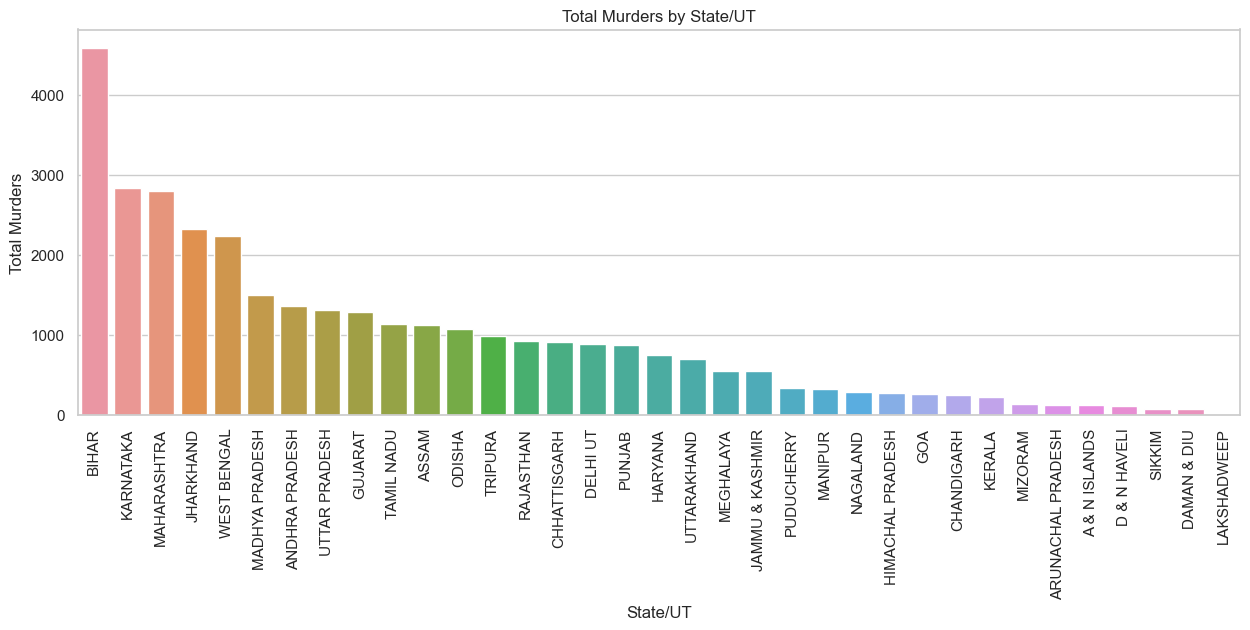

In [34]:
# Bar graph: Total Murders by State/UT
plt.figure(figsize = (15, 5))
sns.barplot(x = total_murders_by_state_ut['State/UT'], y = total_murders_by_state_ut['Total Murders'])
plt.title('Total Murders by State/UT')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph shows varying total murder counts across Indian states and union territories. Key highlights include Bihar with the highest murders (4586), Lakshadweep with the lowest (3), and notable counts in Karnataka (2831) and Maharashtra (2796). 

In [35]:
# Analysis of total murders in each district
total_murders_by_district = sorted_df.groupby(by = 'District').sum().reset_index().sort_values(by = 'Total Murders', ascending = False)
total_murders_by_district[['District', 'Total Murders']]

,District,Total Murders
42,PATNA,4586
6,BANGALORE COMMR.,2831
45,RANCHI,2322
36,MUMBAI COMMR.,1542
0,24 PARGANAS NORTH,1521
13,CYBERABAD,1360
37,MUZAFFARNAGAR,1307
35,MUMBAI,1254
11,CHENNAI,1137
52,WEST,984


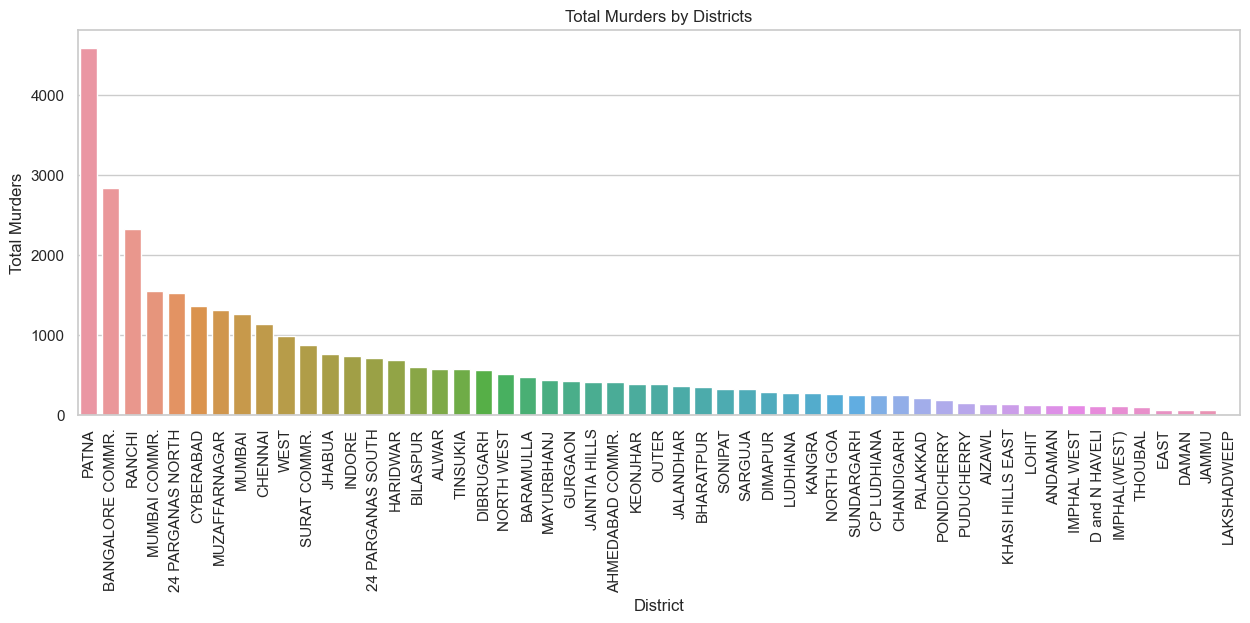

In [36]:
# Bar graph: Total Murders by Districts
plt.figure(figsize = (15, 5))
sns.barplot(x = total_murders_by_district['District'], y = total_murders_by_district['Total Murders'])
plt.title('Total Murders by Districts')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph shows the distribution of total murder counts across different districts. Notable observations include Patna leading with the highest murders (4586), followed by Bangalore Commissionerate (2831) and Ranchi (2322). Districts like Mumbai Commissionerate, 24 Parganas North, and Cyberabad also exhibit substantial counts. The lowest murder counts are observed in Lakshadweep (3). Other districts with relatively lower counts include Jammu (64), and Daman (64).

In [37]:
# Analysis of total murders in each year
total_murders_by_year = sorted_df.groupby(by = 'Year').sum().reset_index().sort_values(by = 'Total Murders', ascending = False)
total_murders_by_year[['Year', 'Total Murders']]

,Year,Total Murders
1,2002,3295
0,2001,3245
3,2004,2996
6,2007,2970
7,2008,2811
5,2006,2699
10,2011,2663
2,2003,2634
11,2012,2524
8,2009,2514


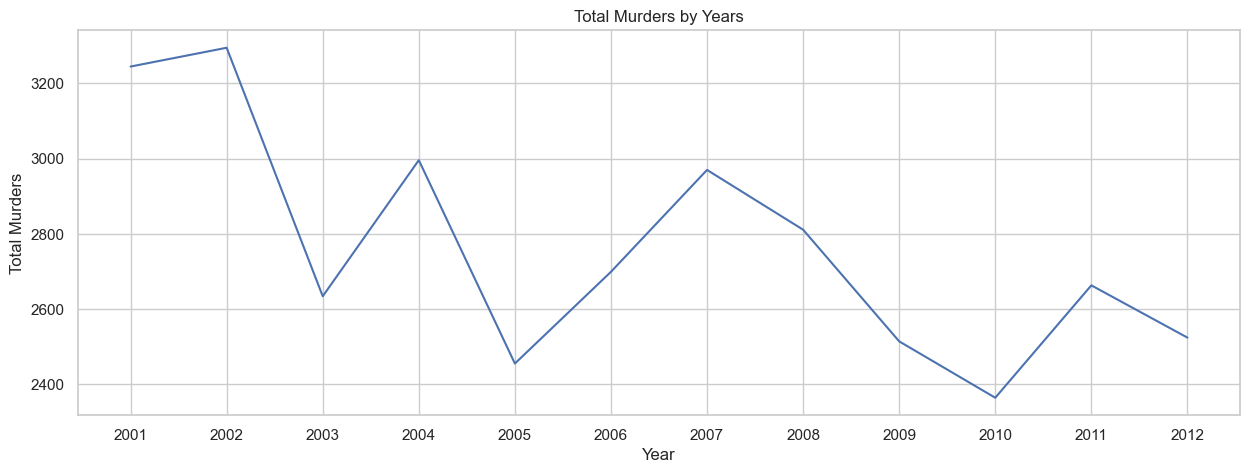

In [38]:
# Bar graph: Total Murders by Years
plt.figure(figsize = (15, 5))
sns.lineplot(x = total_murders_by_year['Year'], y = total_murders_by_year['Total Murders'])
plt.title('Total Murders by Years')
plt.xticks(range(2001, 2013))
plt.show()

#### Observations:
The line plot shows a timeline of total murder counts across various years. Key observations include the peak in 2002 with 3295 murders, closely followed by 2001 with 3245. Subsequent years, such as 2004 (2996), 2007 (2970), and 2008 (2811), also show notable counts. The lowest total murders are recorded in 2010 (2364). Overall, the data indicates fluctuations in murder rates over the specified time period, with the early 2000s showing higher counts.

In [39]:
# Analysis of total murders in each state/UT by years
total_murders_by_year = sorted_df.groupby(by = ['State/UT', 'Year']).sum().reset_index().sort_values(by = 'Total Murders', ascending = False)
total_murders_by_year[['State/UT', 'Year', 'Total Murders']]

,State/UT,Year,Total Murders
39,BIHAR,2004,542
38,BIHAR,2003,484
37,BIHAR,2002,472
40,BIHAR,2005,436
36,BIHAR,2001,434
...,...,...,...
189,LAKSHADWEEP,2012,0
183,LAKSHADWEEP,2006,0
181,LAKSHADWEEP,2004,0
180,LAKSHADWEEP,2003,0


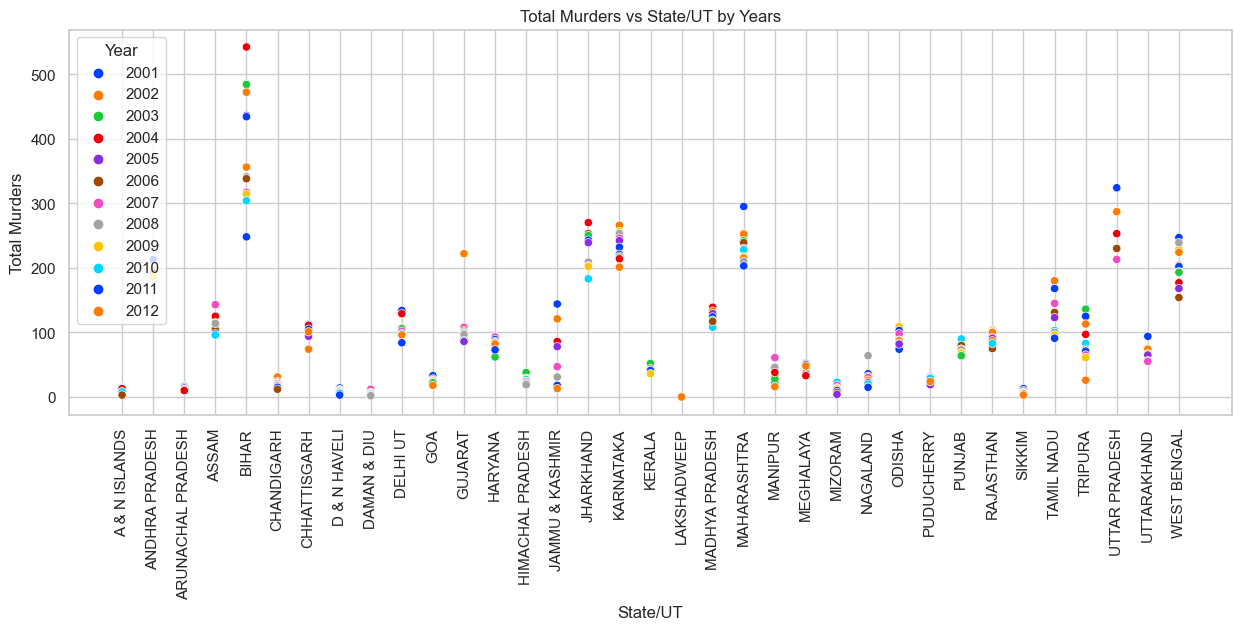

In [40]:
# Bar graph: Total Murders vs State/UT by Years
plt.figure(figsize = (15, 5))
sns.scatterplot(x = sorted_df['State/UT'], y = sorted_df['Total Murders'], hue = sorted_df['Year'], palette = 'bright')
plt.title('Total Murders vs State/UT by Years')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph shows varying murder counts across Indian states and union territories. Bihar consistently records high counts, while states like Uttar Pradesh, Maharashtra, Jharkhand, Karnataka, and others show fluctuating trends. Some regions, like Lakshadweep, have minimal to zero counts. The summary offers insights into the dynamics of murder incidents over the specified years.

In [41]:
# Analysis of total murders in each district by years
total_murders_by_year = sorted_df.groupby(by = ['District', 'Year']).sum().reset_index().sort_values(by = 'Total Murders', ascending = False)
total_murders_by_year[['District', 'Year', 'Total Murders']]

,District,Year,Total Murders
288,PATNA,2004,542
287,PATNA,2003,484
286,PATNA,2002,472
289,PATNA,2005,436
285,PATNA,2001,434
...,...,...,...
223,LAKSHADWEEP,2009,0
221,LAKSHADWEEP,2007,0
220,LAKSHADWEEP,2006,0
218,LAKSHADWEEP,2004,0


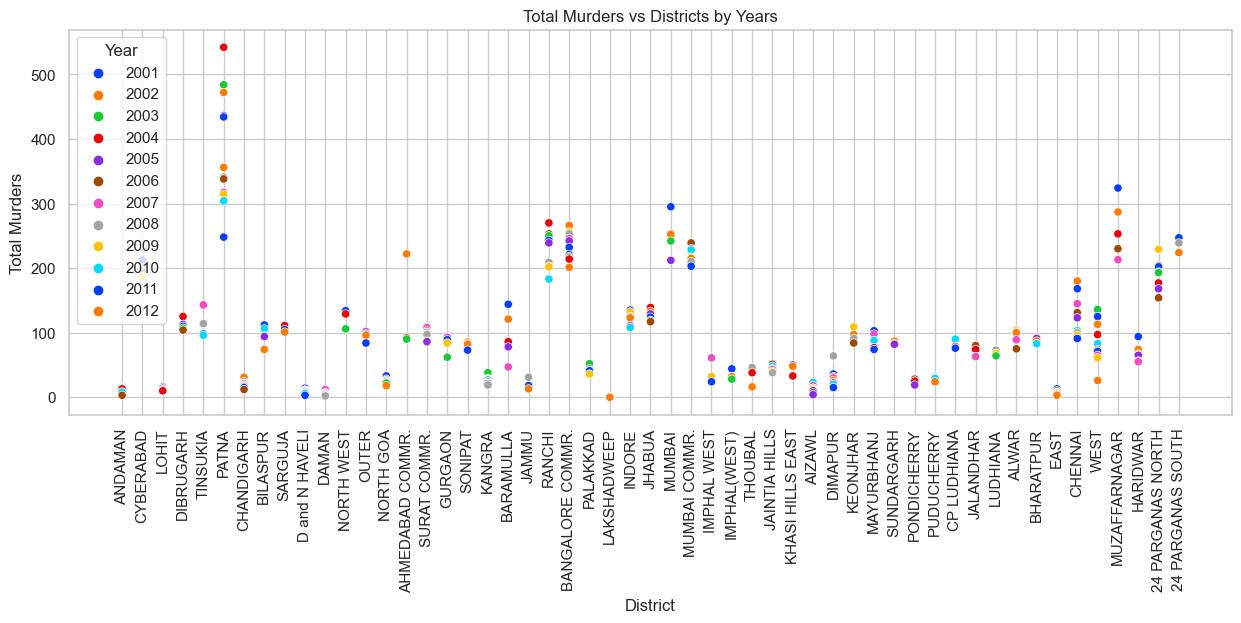

In [42]:
# Bar graph: Total Murders vs Districts by Years
plt.figure(figsize = (15, 5))
sns.scatterplot(x = sorted_df['District'], y = sorted_df['Total Murders'], hue = sorted_df['Year'], palette = 'bright')
plt.title('Total Murders vs Districts by Years')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
The bar graph shows murder counts in various districts over different years. Patna consistently has high murder counts. Muzaffarnagar, Mumbai, Bangalore, and Ranchi also feature prominently. However, there are districts like Lakshadweep with minimal to zero murders. The dataset highlights significant variations in murder incidents across districts and years in India.